# Vision Transformers

## Getting the data

In [ ]:
!wget https://github.com/jonfernandes/flowers-dataset/raw/main/flower_photos.tgz
!tar -xvf flower_photos.tgz


--2022-12-15 20:21:16--  https://github.com/jonfernandes/flowers-dataset/raw/main/flower_photos.tgz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/jonfernandes/flowers-dataset/main/flower_photos.tgz [following]
--2022-12-15 20:21:16--  https://media.githubusercontent.com/media/jonfernandes/flowers-dataset/main/flower_photos.tgz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/octet-stream]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   229MB/s    in 1.0s    

2022-12-15 20:21:17 (229 MB/s) - ‘flower_photos.

In [ ]:
!ls flower_photos

## Using datasets

In [ ]:
!pip install transformers==4.24.0 datasets==2.7.1 evaluate==0.3.0 gradio==3.12.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 14.1 MB/s 
     |████████████████████████████████| 451 kB 63.8 MB/s 
     |████████████████████████████████| 72 kB 1.7 MB/s 
     |████████████████████████████████| 11.6 MB 74.4 MB/s 
     |████████████████████████████████| 7.6 MB 64.2 MB/s 
     |████████████████████████████████| 182 kB 73.7 MB/s 
     |████████████████████████████████| 132 kB 72.3 MB/s 
     |████████████████████████████████| 212 kB 71.2 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 106 kB 62.1 MB/s 
     |████████████████████████████████| 56 kB 5.9 MB/s 
     |████████████████████████████████| 213 kB 62.7 MB/s 
     |████████████████████████████████| 278 kB 76.6 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 

In [ ]:
from datasets import load_dataset

ds = load_dataset('imagefolder', data_files='https://github.com/jonfernandes/flowers-dataset/raw/main/flower_photos.tgz')
ds

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-062daa9e8cf14967/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3670
    })
})

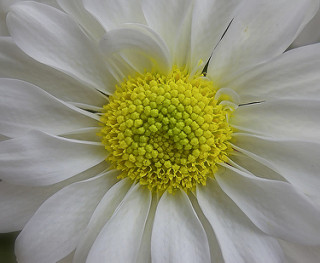

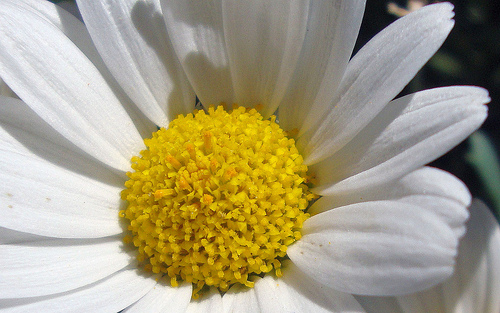

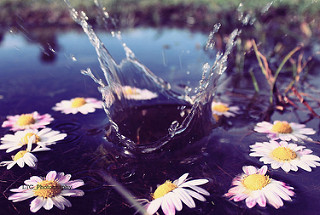

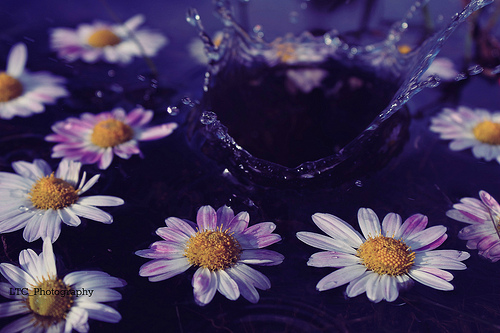

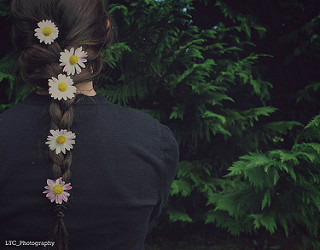

In [ ]:
for i in range(5):
  display(ds['train'][i]['image'])

In [ ]:
labels = ds['train'].features['label'].names
labels

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
ds_train_validation = ds['train'].train_test_split(test_size=0.1, seed=1, shuffle=True)
ds_train_validation

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3303
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 367
    })
})

In [ ]:
ds_train_validation['validation'] = ds_train_validation.pop('test')
ds_train_validation

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3303
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 367
    })
})

In [ ]:
ds.update(ds_train_validation)
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3303
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 367
    })
})

In [ ]:
ds_train_test = ds['train'].train_test_split(test_size=0.1, seed=1, shuffle=True)
ds_train_test

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2972
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 331
    })
})

In [ ]:
ds.update(ds_train_test)
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2972
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 367
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 331
    })
})

## Using a pre-trained model without fine-tuning

In [ ]:
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
import torch
model_id = 'google/vit-base-patch16-224'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModelForImageClassification.from_pretrained(model_id).to(device)
model.eval()


In [ ]:
feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)
feature_extractor

In [ ]:
train_image_id = 3
one_image = ds['train'][train_image_id]['image']
one_image

In [ ]:
inp = feature_extractor(images=one_image, return_tensors='pt')
inp

In [ ]:
#This will not work if you are using a GPU
outp = model(**inp)
outp

In [ ]:
inp = feature_extractor(images=one_image, return_tensors='pt').to(device)
outp = model(**inp)
outp

In [ ]:
outp.logits.shape

In [ ]:
torch.argmax(outp.logits, dim=1)

In [ ]:
pred = torch.argmax(outp.logits, dim=1).item()
pred

In [ ]:
model.config

In [ ]:
model.config.id2label[pred]

In [ ]:
'daisy' in model.config.label2id

## Defining a model

In [ ]:
model_id = 'google/vit-base-patch16-224'

In [ ]:
labels = ds['train'].features['label'].names
labels

In [ ]:
id2label = {key: value for key, value in enumerate(labels)}
id2label

In [ ]:
label2id = {value:key for key, value in enumerate(labels)}
label2id

In [ ]:
model = AutoModelForImageClassification.from_pretrained(model_id,
                                                        num_labels=len(labels),
                                                        id2label=id2label,
                                                        label2id=label2id,
                                                        ignore_mismatched_sizes=True
                                                        )

## Pre-processing images

In [ ]:
import torchvision

from torchvision.transforms import (
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    ToTensor,
    Resize,
    CenterCrop
)

In [ ]:
normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)

In [ ]:
feature_extractor.size

In [ ]:
train_transform = Compose(
    [
     RandomResizedCrop(feature_extractor.size),
     RandomHorizontalFlip(),
     ToTensor(),
     normalize
    ]
)

validation_transform = Compose(
        [
            Resize(feature_extractor.size),
            CenterCrop(feature_extractor.size),
            ToTensor(),
            normalize,
        ]
    )

def train_transform_images(images):
  images["pixel_values"] = [train_transform(image.convert("RGB")) for image in images["image"]]
  return images

def validation_transform_images(images):
  images["pixel_values"] = [validation_transform(image.convert("RGB")) for image in images["image"]]
  return images

In [ ]:
transformed_ds = ds.with_transform(train_transform_images)
transformed_ds['train'] = ds['train'].with_transform(train_transform_images)
transformed_ds['validation'] = ds['validation'].with_transform(validation_transform_images)
transformed_ds['test'] = ds['test'].with_transform(validation_transform_images)

## A transformed image

In [ ]:
sample_image = ds['train'][train_image_id]['image']
sample_image

In [ ]:
# Re-run cell multiple times (train_transform)
import matplotlib.pyplot as plt
transformed_sample_image = train_transform(sample_image)
plt.imshow(transformed_sample_image)#.permute(1, 2, 0))

In [ ]:
transformed_sample_image

In [ ]:
# Re-run cell multiple times (validation_transform)
import matplotlib.pyplot as plt
transformed_sample_image = validation_transform(sample_image)
plt.imshow(transformed_sample_image.permute(1, 2, 0))

## Getting images in the correct format

**4-images**

In [ ]:
four_images = [transformed_ds['train'][i] for i in range(4)]
four_images

In [ ]:
print(four_images[0]['pixel_values'].shape, four_images[1]['pixel_values'].shape, four_images[2]['pixel_values'].shape, four_images[3]['pixel_values'].shape)

In [ ]:
four_images_labels = [image['label'] for image in four_images]
four_images_labels

In [ ]:
import torch
four_images_labels = torch.tensor([image['label'] for image in four_images])
four_images_labels

In [ ]:
#will get an error
four_images_pixel_values = torch.tensor([image['pixel_values'] for image in four_images])
four_images_pixel_values

In [ ]:
four_images_pixel_values = torch.cat([image['pixel_values'] for image in four_images])
four_images_pixel_values

In [ ]:
four_images_pixel_values.shape

In [ ]:
four_images_pixel_values = torch.stack([image['pixel_values'] for image in four_images])
four_images_pixel_values.shape

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(images):
  labels = torch.tensor([image['label'] for image in images])
  pixel_values = torch.stack([image['pixel_values'] for image in images])
  return {'pixel_values': pixel_values, 'labels': labels}

train_dataloader = DataLoader(transformed_ds['train'], batch_size=4, collate_fn=collate_fn, shuffle=True)
validation_dataloader = DataLoader(transformed_ds['validation'], batch_size=4, collate_fn=collate_fn, shuffle=False)
test_dataloader = DataLoader(transformed_ds['test'], batch_size=4, collate_fn=collate_fn, shuffle=False)

In [ ]:
batch = next(iter(train_dataloader))

for key, value in batch.items():
  print(key, value.shape)

## Training arguments

In [ ]:
from transformers import TrainingArguments, Trainer

batch_size=32
metric_name = "accuracy"
model_name = 'vit-base-patch16-224-finetuned-flower'

args = TrainingArguments(
    model_name,
    evaluation_strategy="steps",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    remove_unused_columns=False,
    logging_dir='./logs', 
    push_to_hub=True
)

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!git config --global credential.helper store

## Model Training

In [ ]:
args = TrainingArguments(
    model_name,
    evaluation_strategy="steps",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=1,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    remove_unused_columns=False,
    logging_dir='./logs', 
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=transformed_ds['train'],
    eval_dataset=transformed_ds['validation'],
    tokenizer=feature_extractor,
    data_collator=collate_fn,
)

trainer.train()

In [ ]:
trainer.predict(transformed_ds['test'])

From the [evaluate documentation](https://huggingface.co/docs/evaluate/a_quick_tour#compute):

```
metric.compute(
          references=..., 
          predictions=...)
```

In [ ]:
import evaluate
import numpy as np

metric = evaluate.load('accuracy')

def compute_metrics(batch):
  return metric.compute(
      references=batch.label_ids,
      predictions=np.argmax(batch.predictions, axis=1))

In [ ]:
args = TrainingArguments(
    model_name,
    evaluation_strategy="steps",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    remove_unused_columns=False,
    logging_dir='./logs', 
    push_to_hub=True
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=transformed_ds['train'],
    eval_dataset=transformed_ds['validation'],
    tokenizer=feature_extractor,
    data_collator=collate_fn,
    compute_metrics=compute_metrics
)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/

In [ ]:
trainer.train()
trainer.save_model()

In [ ]:
trainer.evaluate(transformed_ds['train'])

In [ ]:
trainer.evaluate(transformed_ds['validation'])

In [ ]:
trainer.evaluate(transformed_ds['test'])

## Inference in notebook

In [ ]:
test_image = ds['test'][-1]['image']
test_image

In [ ]:
import torch
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

model_id = f'jonathanfernandes/vit-base-patch16-224-finetuned-flower'

def classify_image(image):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = AutoModelForImageClassification.from_pretrained(model_id).to(device)
  feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)  
  inp = feature_extractor(image, return_tensors='pt').to(device)
  outp = model(**inp)
  pred = torch.argmax(outp.logits, dim=-1).item()
  return model.config.id2label[pred]

classify_image(test_image)

In [ ]:
import torch

model_id = f'jonathanfernandes/vit-base-patch16-224-finetuned-flower'

def classify_image(image):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = AutoModelForImageClassification.from_pretrained(model_id).to(device)
  feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)
  inp = feature_extractor(image, return_tensors='pt').to(device)
  outp = model(**inp)
  pred = torch.nn.functional.softmax(outp.logits, dim=-1)
  preds = pred[0].cpu().detach().numpy()
  confidence = {label: float(preds[i]) for i, label in enumerate(labels)}
  return confidence

classify_image(test_image)

In [ ]:
from transformers import pipeline

model_id = f'jonathanfernandes/vit-base-patch16-224-finetuned-flower'
feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)

image_classifier = pipeline('image-classification', model=model_id, feature_extractor=feature_extractor)
image_classifier(test_image)

## Inference on your phone using Gradio

In [ ]:
!wget https://github.com/jonfernandes/Advanced_AI_Transformers_for_Computer_Vision/raw/main/flower-1.jpg
!wget https://github.com/jonfernandes/Advanced_AI_Transformers_for_Computer_Vision/raw/main/flower-2.jpeg

In [ ]:
!ls -l

In [ ]:
import torch
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
import gradio as gr

model_id = f'jonathanfernandes/vit-base-patch16-224-finetuned-flower'
labels = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

def classify_image(image):
  model = AutoModelForImageClassification.from_pretrained(model_id)
  feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)
  inp = feature_extractor(image, return_tensors='pt')
  outp = model(**inp)
  pred = torch.nn.functional.softmax(outp.logits, dim=-1)
  preds = pred[0].cpu().detach().numpy()
  confidence = {label: float(preds[i]) for i, label in enumerate(labels)}
  return confidence

interface = gr.Interface(fn=classify_image, 
                         inputs='image', 
                         examples=['flower-1.jpeg', 'flower-2.jpeg'],
                         outputs='label').launch(debug=True, share=True)